In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import time

In [6]:
def sigmoid(x):
    return 1/(1.0 + np.exp(-1*x))

def sigmoid_prime(sig):
    return sig * (1 - sig)

def cost(y, y_pred):
    return np.sum(np.square(y - y_pred))/(2*y.shape[0])

In [7]:
def predict(x, wt, bs):
    z = []
    a = []

    # forward propagation
    z.append(np.dot(x,wt[0]))
    z[0] += bs[0]
    a.append(sigmoid(z[0]))
    for i in range(len(wt)-1):
        tmp = np.dot(a[i],wt[i+1])
        tmp += bs[i+1]
        z.append(tmp)
        a.append(sigmoid(z[i+1]))
    
    return a[-1]

## Function to Train the Dataset

In [8]:
def train(x, y, nodes, epochs, alpha, wts, bys, flag):

    if flag == 0:
        # randomly initialising weights
        #wts = []
        for i in range(len(nodes)-1):
            tmp = np.random.randn(nodes[i], nodes[i+1]) * np.sqrt(2/(nodes[i+1] + nodes[i]))
            wts.append(tmp)
        
        # randomly initialising biases
        #bys = []
        for i in range(len(nodes)-1):
            tmp = np.zeros((1, nodes[i+1]))
            bys.append(tmp)

    itr = 0;
    while itr < epochs:
        z = []
        a = []

        # forward propagation
        z.append(np.dot(x,wts[0]))
        z[0] += bys[0]
        a.append(sigmoid(z[0]))
        for i in range(len(wts)-1):
            tmp = np.dot(a[i],wts[i+1])
            tmp += bys[i+1]
            z.append(tmp)
            a.append(sigmoid(z[i+1]))


        # backward propagation
        d =[]
        tmp = np.multiply((y - a[-1]), sigmoid_prime(a[-1]))
        d.append(tmp)
        l = len(wts)    # length of wts list
        for i in range(l-1):
            #print(d[i].shape, '\n', d[i])
            #print(wts[l-1-i].shape, '\n', wts[l-1-i])
            tmp = np.multiply(np.dot(d[i], wts[l-1-i].T), sigmoid_prime(a[l-2-i]))
            d.append(tmp)
        d.reverse()
        # update weights and biases
        n = x.shape[0]
        wts[0] = wts[0] + alpha * np.dot(x.T, d[0]) / n
        bys[0] = bys[0] + alpha * np.sum(d[0], axis=0) / n
        for i in range(1,l):
            wts[i] = wts[i] + alpha * np.dot(a[i-1].T, d[i]) / n
            bys[i] = bys[i] + alpha * np.sum(d[i], axis=0) / n

        itr += 1
        
    return wts, bys
            

## Loading the MNIST Data


*   **X_train** and **X_test** contain 60000 and 10000 respectively images of dimensionn 28*28
*   **Y_train** and **Y_test** contain labels for the above images





In [9]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

Y_train_cat = to_categorical(Y_train,10)
Y_test_cat = to_categorical(Y_test,10)

print(X_train.shape, X_test.shape)
print(Y_train_cat.shape, Y_test_cat.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


## Training:
* Stocastic Gradient Descent has been used
* batch_size determines the size of minibatches being sent to train function to be trained
* For each epoch the _train()_ function is run once on each of the minibatches
    * For eg: if _batch_size_ is 100 and _ep_ is 100 then the _train()_ function is called 60000/100 = 6000 times in each epoch
    * that implies _train()_ function is called in total of 6000*100 = 6e5 times

In [10]:
batch_size = 100
s,e = 0,batch_size
ep = 1e2
lr = 0.9

wts, bys = [], []
total_cost = []
flag = 0

start_time = time.time()

for i in range(int(ep)):
    s,e = 0,batch_size

    data = np.append(X_train, Y_train_cat, axis=1)
    np.random.shuffle(data)
    X_train, Y_train_cat = data[:, 0:X_train.shape[1]], data[:, X_train.shape[1]:data.shape[1]]



    while e <= X_train.shape[0]:
        wts, bys = train(X_train[s:e,:], Y_train_cat[s:e,:], [784, 157, 20, 10], 1, lr, wts, bys, flag)
        flag = 1
        s += batch_size
        e += batch_size
    
    Y_pred = predict(X_train, wts, bys)
    total_cost.append(cost(Y_train_cat, Y_pred))

    if i%(ep//10) == 0:
        print('iteration:', i, 'cost:', total_cost[-1])

end_time = time.time()

iteration: 0 cost: 0.24016241567815105
iteration: 10 cost: 0.04620763122962397
iteration: 20 cost: 0.029141516342858262
iteration: 30 cost: 0.021080013348334266
iteration: 40 cost: 0.015707488168298766
iteration: 50 cost: 0.012222968563091149
iteration: 60 cost: 0.009997086511841616
iteration: 70 cost: 0.008178149592036776
iteration: 80 cost: 0.006639701027083247
iteration: 90 cost: 0.005543096529118619


In [16]:
print('time taken =', end_time-start_time, 's')
print('time taken =', (end_time-start_time)/60, 'min')

time taken = 413.1752510070801 s
time taken = 6.886254183451334 min


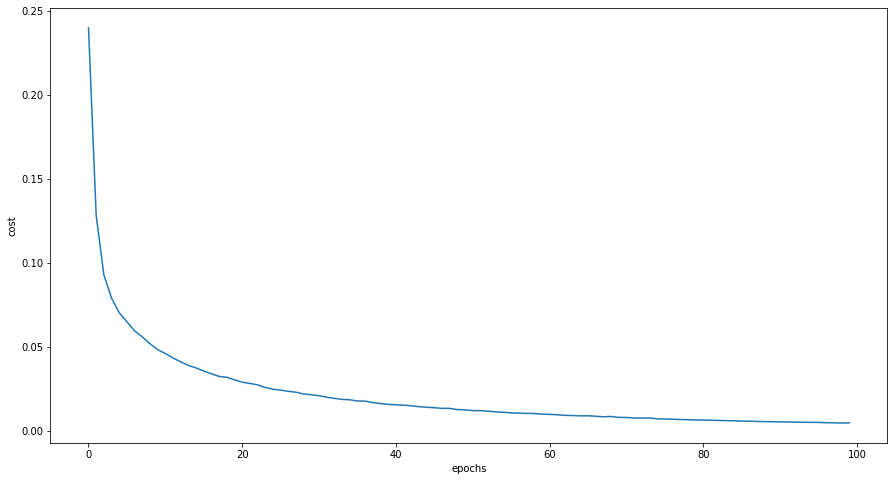

In [12]:
fig = plt.figure(figsize=(15,8))
plt.plot(range(int(ep)), total_cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

In [13]:
pred_train = predict(X_train, wts, bys)
#pred_train = np.round(pred_train)
temp1 = np.argmax(pred_train, axis=1)
temp2 = np.argmax(Y_train_cat, axis=1)
#print(np.sum(temp==Y_train))
accu = np.sum(temp1 == temp2)*100/Y_train.shape[0]
print('train accuracy =',accu)

train accuracy = 99.555


In [14]:
pred_test = predict(X_test, wts, bys)
temp = np.argmax(pred_test, axis=1)
accu = np.sum(temp==Y_test)*100/Y_test.shape[0]
print('test accuracy = ',accu)

test accuracy =  98.02
